<a href="https://colab.research.google.com/github/Tyton25/machine_learning/blob/master/sterlings_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [82]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])

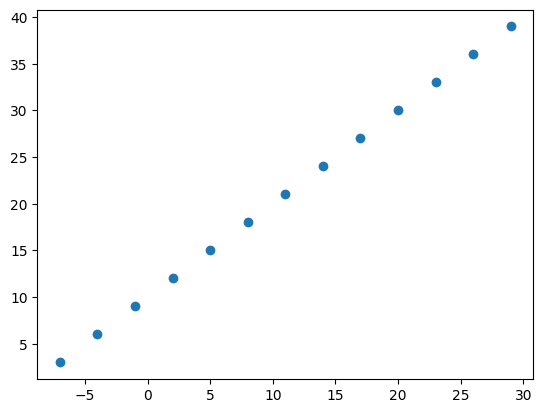

In [97]:
plt.scatter(X,y)

In [95]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 23.7905 - mae: 23.7905
Epoch 2/200
1/1 [==============================] - 0s 17ms/step - loss: 17.5812 - mae: 17.5812
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 11.4038 - mae: 11.4038
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 5.7537 - mae: 5.7537
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 9.3219 - mae: 9.3219
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 9.7243 - mae: 9.7243
Epoch 7/200
1/1 [==============================] - 0s 16ms/step - loss: 7.9118 - mae: 7.9118
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 5.9175 - mae: 5.9175
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 6.7692 - mae: 6.7692
Epoch 10/200
1/1 [==============================] - 0s 17ms/step - loss: 7.8062 - mae: 7.8062
Epoch 11/200
1/1 [==============================] - 0s 19ms/step 

In [96]:
model.predict([17.0])

1/1 [==============================] - 0s 107ms/step


array([[27.03302]], dtype=float32)